### Import libraries

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score, cohen_kappa_score, roc_curve

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 14

### Read the files

In [2]:
df = pd.read_parquet('./c_manual_annotation.parquet')

### Kappa score between annotators

In [3]:
# filter the ones from round 2, and which were separately annotated by each annotator
FILTER = (df['annotation round']==2) & (df['annotator']=='1&2')

# compute Cohen's Kappa
cohen_kappa_score(df[FILTER]['annotator 1'], df[FILTER]['annotator 2'])

0.8220640569395018

### Assess model performance

In [4]:
fpr, tpr, thresholds = roc_curve(df['decision'], df['c_score'])
score = roc_auc_score(df['decision'], df['c_score'])

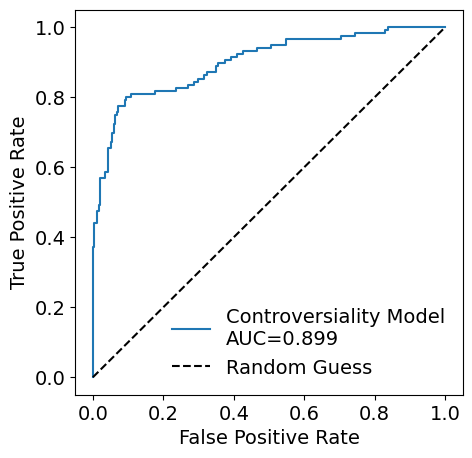

In [7]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f'Controversiality Model\nAUC={round(score,3)}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(frameon=False)
plt.savefig('../../figures/model_validations/c_model.pdf')
plt.show()